<a href="https://colab.research.google.com/github/SushSushmithagowda/ML-101-projects/blob/main/detecting_objects_using_yolov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content.gdrive')

Mounted at /content.gdrive


In [3]:
!nvidia-smi

Mon Mar 21 02:11:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
#clone darknet repository
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.02 MiB | 18.75 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.


In [5]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 39 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http://arch

In [6]:
#go to the darknet folder, edit and remake Makefiles of GPU and OPENCV
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1444:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1420:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb

In [5]:
# get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2022-03-21 02:04:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  61.3MB/s    in 4.1s    

2022-03-21 02:04:52 (57.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [6]:
!pwd

/content/darknet


In [9]:
!head 6 cfg/coco.data

head: cannot open '6' for reading: No such file or directory
==> cfg/coco.data <==
classes= 80
train = data/coco/trainvalno5k.txt
valid  = data/coco/5k.txt
#valid = data/coco_val_5k.list
names = data/coco.names
backup = backup
eval=coco



In [7]:
!sed -i 's|train  = /home/pjreddie/data/coco/trainvalno5k.txt|train = data/coco/trainvalno5k.txt|' cfg/coco.data
!sed -i 's|valid  = coco_testdev|valid  = data/coco/5k.txt|' cfg/coco.data
!sed -i 's|backup = /home/pjreddie/backup/|backup = backup|' cfg/coco.data

In [8]:
!head -6 cfg/coco.data

classes= 80
train = data/coco/trainvalno5k.txt
valid  = data/coco/5k.txt
#valid = data/coco_val_5k.list
names = data/coco.names
backup = backup


In [10]:
!head -6 cfg/voc.data

classes= 20
train  = /home/pjreddie/data/voc/train.txt
valid  = /home/pjreddie/data/voc/2007_test.txt
names = data/voc.names
backup = /home/pjreddie/backup/



In [11]:
!sed -i 's|train=/home/pjreddie/data/voc/train.txt|train= data_from_2007_to_2012/train.txt|' cfg/voc.data
!sed -i 's|valid=/home/pjreddie/data/voc/2007_test.txt|valid = data_from_2007_to_2012/2007_test.txt|' cfg/voc.data
!sed -i 's|backup=/home/pjreddie/backup/|backup =backup|' cfg/voc.data


In [12]:
!head -6 cfg/voc.data

classes= 20
train  = /home/pjreddie/data/voc/train.txt
valid  = /home/pjreddie/data/voc/2007_test.txt
names = data/voc.names
backup = /home/pjreddie/backup/



In [16]:
%cd ..

/content


In [15]:
!cp /content.gdrive/MyDrive/darknet/obj.data /content/darknet/cfg/obj.data

In [16]:
!cp cfg/yolov3.cfg cfg/yolov3-obj.cfg

In [55]:
!head -6 /content/darknet/cfg/yolov3-voc.cfg

[net]
# Testing
 batch=1
 subdivisions=1
# Training
# batch=64


In [23]:
!unzip /content.gdrive/MyDrive/yolov3.weights.zip

Archive:  /content.gdrive/MyDrive/yolov3.weights.zip
replace yolov3.weights? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: yolov3.weights          


In [24]:
!cp /content/darknet/yolov3.weights //content/darknet/cfg/yolov3-obj.weights

In [31]:
!head -6 /content/darknet/data/coco.names

person
bicycle
car
motorbike
aeroplane
bus


In [32]:
!head -6 /content/darknet/data/voc.names

aeroplane
bicycle
bird
boat
bottle
bus


In [17]:
!cp /content.gdrive/MyDrive/darknet/obj.names /content/darknet/data/obj.names

In [64]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/dog.jpg

 CUDA-version: 11010 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 

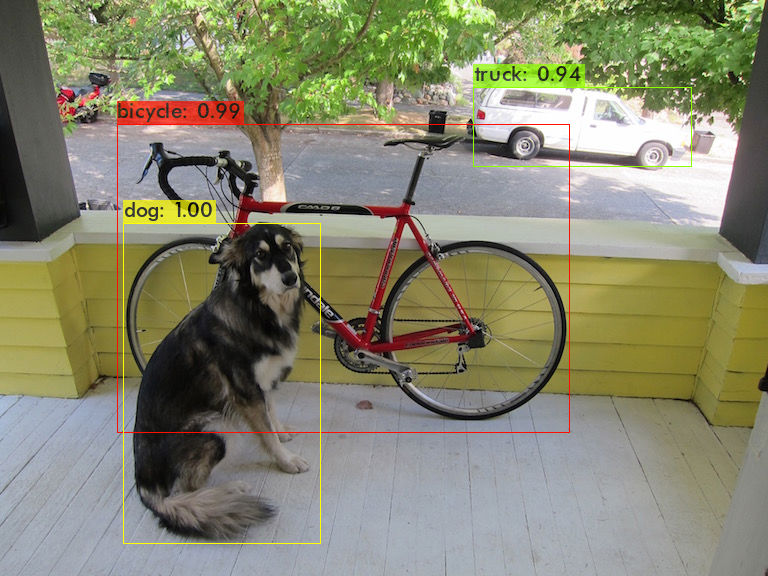

In [65]:
from IPython.display import Image
Image("predictions.jpg")

In [84]:
!cp /content.gdrive/MyDrive/darknet/photo.jpg /content/darknet/data/photo.jpg
# !cp /content.gdrive/MyDrive/darknet/manu_sush.jpg /content/darknet/data/manu_sush.jpg
#!cp /content.gdrive/MyDrive/darknet/New_Year.jpg /content/darknet/data/New_Year.jpg

In [75]:
!cp /content.gdrive/MyDrive/darknet/manu_sush.jpg /content/darknet/data/manu_sush.jpg

In [85]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/photo.jpg
# !./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/manu_sush.jpg
#!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/New_Year.jpg

 CUDA-version: 11010 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 

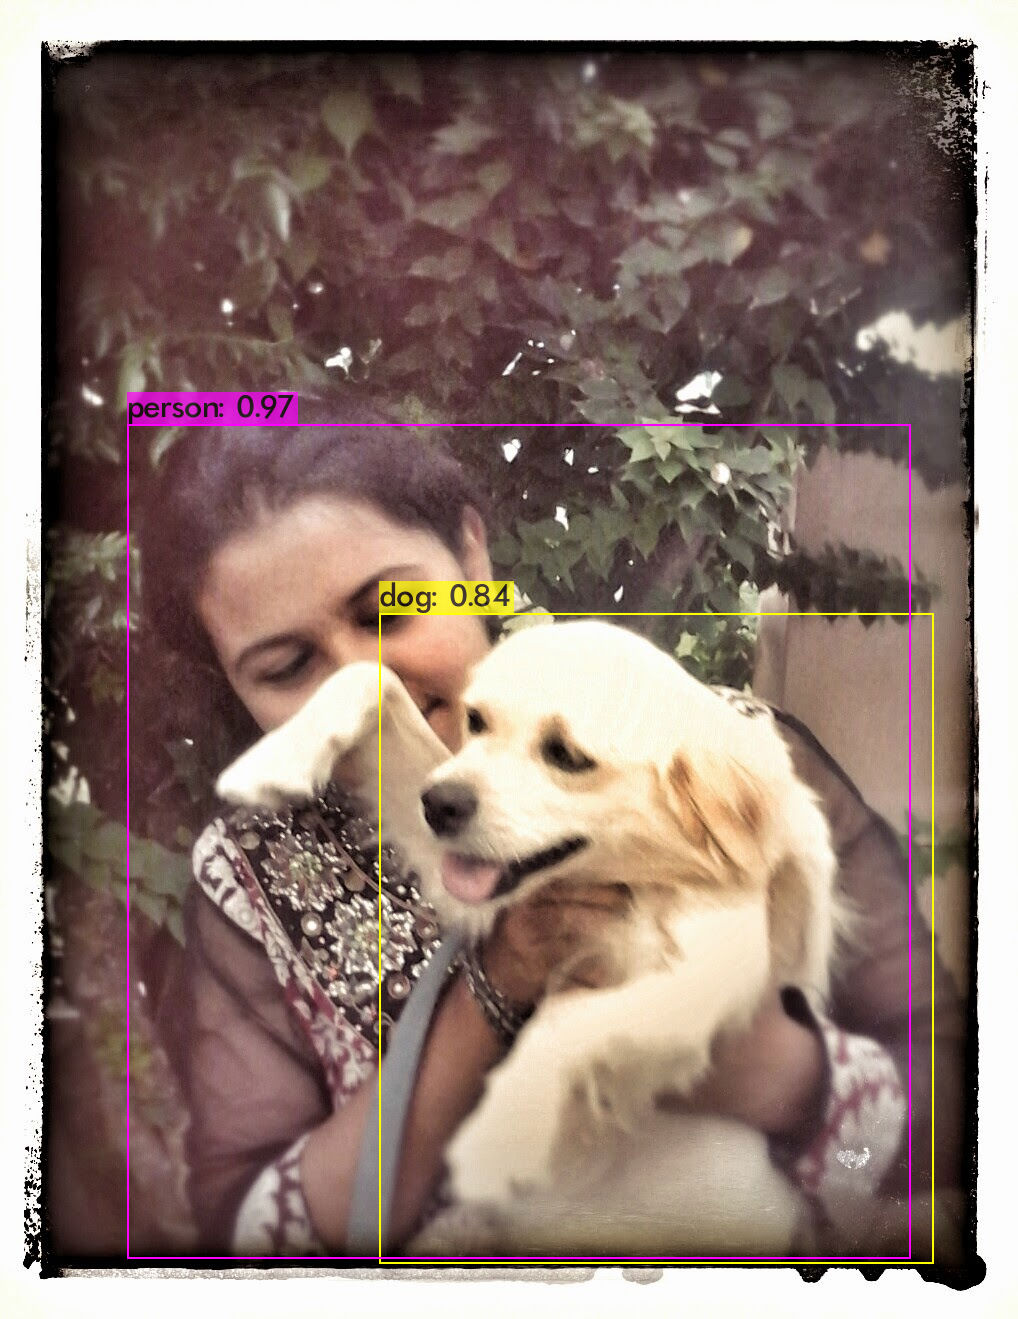

In [86]:

Image("predictions.jpg")

In [34]:
%cd data

/content/darknet/data


In [51]:
from google.colab import files
uploaded = files.upload()

Saving detections_image.gif to detections_image.gif


In [56]:
for name, data in uploaded.items():
  with open(name, "wb") as f:
    f.write(data)

In [57]:
%cd /content/darknet

/content/darknet


In [58]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/detections_image.gif --out_filename data/detections_image.gif -dont_show

 CUDA-version: 11010 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 

In [55]:
from IPython.display import Image
with open('/content.gdrive/MyDrive/darknet/detections_image.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

FileNotFoundError: ignored

In [39]:
%cd ..

/content


In [41]:
!cp /content/darknet/data/car--Labeled.mp4 /content.gdrive/MyDrive/car--Labeled.mp4

cp: cannot stat '/content/darknet/data/car--Labeled.mp4': No such file or directory


In [50]:
!unzip /content.gdrive/MyDrive/darknet/detections.gif.zip

Archive:  /content.gdrive/MyDrive/darknet/detections.gif.zip
  inflating: detections.gif          


In [57]:
%cd ..

/content


In [99]:
!cp /content/darknet/data/car--Labeled.mp4 drive/My\ Drive/darknet/car--Labeled.mp4

cp: cannot stat '/content/darknet/data/car--Labeled.mp4': No such file or directory


In [69]:
!./darknet detector test cfg/obj.data cfg/yolov3.cfg yolov3.weights data/car_on_road.mp4 -out_filename data/car_on_road--Labeled.mp4 -dont_show

/bin/bash: ./darknet: Is a directory


In [17]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libmp3lame-dev is already the newest version (3.100-2).
libtheora-dev is already the newest version (1.1.1+dfsg.1-14).
libv4l-dev is already the newest version (1.14.2-1).
libvorbis-dev is already the newest version (1.3.5-4.2).
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python3-numpy is already the newest version (1:1.13.3-2ubuntu1).
libdc1394-22 is already the newest version (2.2.5-1).
libdc1394-22-dev is already the newest version (2.2.5-1).
libopencore-amrnb-dev is already the newest version (0.1.3-2.1).
libopencore-amrwb-dev is already the newest version (0.1.3-2.1).
libtbb-dev is already the newest version (2017~U7-8).
libxine2-dev is already the newest version (1.2.8-2build2).
libxvidcore-dev is already the newest version (2:1.3.5-1).
v4l-utils is already the newest version (1.14.2-1).
x264 is already the ne

In [31]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/darknet/detections.gif

 CUDA-version: 11010 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 

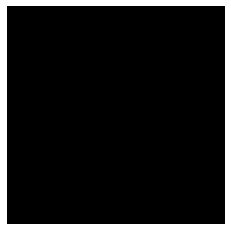

In [32]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [27]:
!unzip /content.gdrive/MyDrive/detections.gif.zip

Archive:  /content.gdrive/MyDrive/detections.gif.zip
  inflating: detections.gif          


In [28]:
from IPython.display import Image
with open('/content/darknet/detections.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

error: ignored

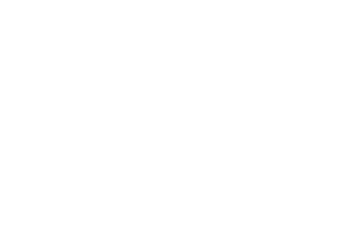

In [29]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = '/content/darknet/detections.gif'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [33]:
!head 6 cfg/coco.data

head: cannot open '6' for reading: No such file or directory
==> cfg/coco.data <==
classes= 80
train  = /home/pjreddie/data/coco/trainvalno5k.txt
valid  = coco_testdev
#valid = data/coco_val_5k.list
names = data/coco.names
backup = /home/pjreddie/backup/
eval=coco

